# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score? Bitcoin has the highest with 0.055280
2. Which coin had the highest negative score? Ethereum with 0.289000
3. Which coin had the highest positive score? Bitcoin with 0.275000

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv('example.env')
%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sheld\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Read your api key environment variable
api_key = os.getenv("news_api")
type(api_key)


str

In [7]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [8]:
newsapi

In [9]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 11906


In [10]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 4672


In [11]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
    
# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]
    
# Drop "Date" column
bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.3818,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...
1,0.2960,0.00,0.942,0.058,Shares of Square are up more than 6% today aft...
2,0.0000,0.00,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
3,0.4939,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...
4,0.0000,0.00,1.000,0.000,Cryptocurrency prices continued to tumble Frid...


In [12]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]
ethereum_df = ethereum_df.drop(columns=['date'])
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.2263,0.000,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W..."
1,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...
2,0.5499,0.000,0.894,0.106,Solana isn’t known yet outside of the crypto c...
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [13]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.00000,100.000000
mean,0.066883,0.039110,0.90564,0.055280
std,0.397988,0.053804,0.08300,0.067863
min,-0.762700,0.000000,0.67700,0.000000
25%,-0.058450,0.000000,0.85450,0.000000
50%,0.000000,0.000000,0.91250,0.019500
75%,0.381800,0.070250,1.00000,0.081750
max,0.845500,0.219000,1.00000,0.275000


In [14]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.050873,0.036090,0.916460,0.047440
std,0.339081,0.059856,0.080576,0.055704
min,-0.918600,0.000000,0.694000,0.000000
25%,-0.083575,0.000000,0.859500,0.000000
50%,0.000000,0.000000,0.929500,0.046000
75%,0.238025,0.067250,1.000000,0.077250
max,0.822500,0.289000,1.000000,0.256000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a score of 0.059830, which is just a fraction higher than Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin with just fractions over Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin with fraction over Etherum 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'also', 'since', 'youve'}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
    return tokens

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3818,0.00,0.929,0.071,Just weeks after Tesla started accepting Bitco...,"[week, tesla, started, accepting, bitcoin, cur..."
1,0.2960,0.00,0.942,0.058,Shares of Square are up more than 6% today aft...,"[shares, square, today, american, fintech, com..."
2,0.0000,0.00,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[teslas, relationship, bitcoin, dalliance, acc..."
3,0.4939,0.05,0.816,0.134,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,"[image, tesla, tesla, ha, stopped, accepting, ..."
4,0.0000,0.00,1.000,0.000,Cryptocurrency prices continued to tumble Frid...,"[cryptocurrency, price, continued, tumble, fri..."


In [20]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2263,0.000,0.940,0.060,"Vitalik Buterin, the creator of Ethereum, on W...","[vitalik, buterin, creator, ethereum, wednesda..."
1,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, detrac..."
2,0.5499,0.000,0.894,0.106,Solana isn’t known yet outside of the crypto c...,"[solana, isnt, known, yet, outside, crypto, co..."
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[new, york, cnn, businessbitcoin, price, conti..."
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('elon', 'musk'): 26, ('currency', 'bitcoin'): 10, ('char', 'reuters'): 10, ('char', 'bitcoin'): 8, ('virtual', 'currency'): 8, ('illustration', 'taken'): 8, ('accepting', 'bitcoin'): 6, ('new', 'york'): 6, ('elon', 'musks'): 6, ('representation', 'virtual'): 6}


In [25]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('virtual', 'currency'): 11, ('illustration', 'taken'): 11, ('char', 'bitcoin'): 9, ('bitcoin', 'ethereum'): 9, ('representation', 'virtual'): 9, ('seen', 'front'): 8, ('front', 'stock'): 8, ('stock', 'graph'): 8, ('graph', 'illustration'): 8, ('char', 'reuters'): 7}


In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 100), ('bitcoin', 73), ('tesla', 32)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 99), ('bitcoin', 45), ('ethereum', 30)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

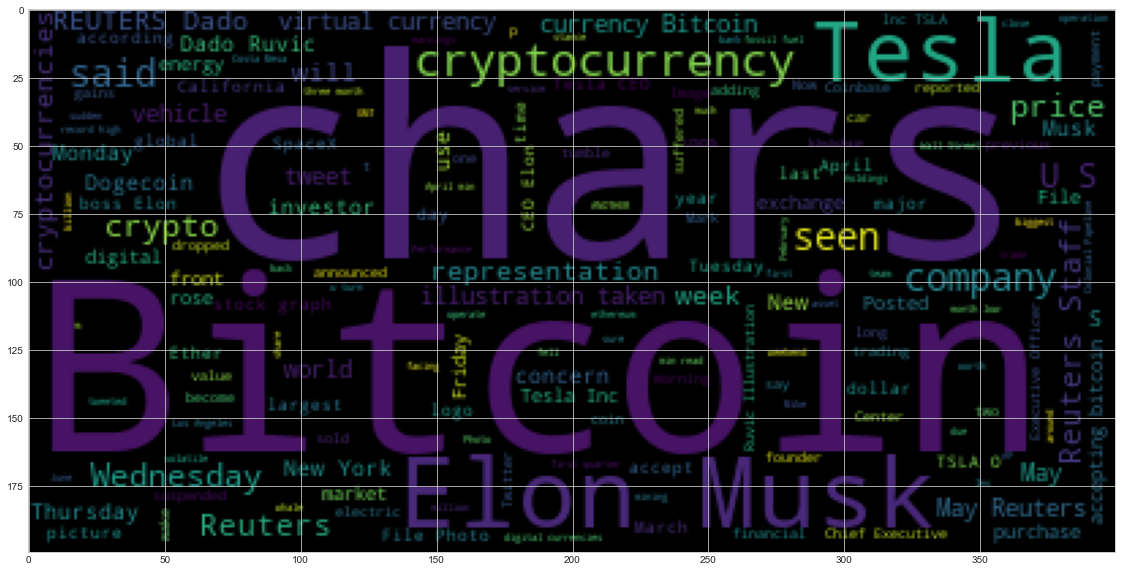

In [31]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

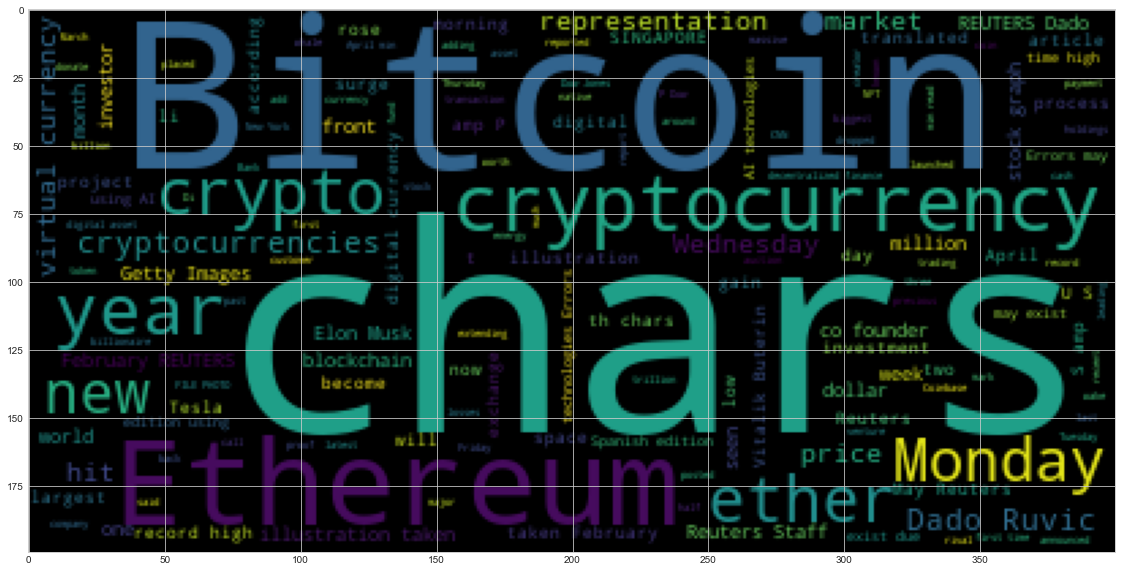

In [33]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [37]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'Just weeks after Tesla started accepting Bitcoin as currency for cars, Elon Musk revealed in a tweet that it will "suspend" the effort. According to the release (Tesla does not appear to have a funct… [+768 chars] Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Image: Tesla\r\n\n \n\n Tesla has stopped accepting bitcoin as payment for its cars out of concern that it will contribute to greater consumption of fossil fuels, according to a statement CEO Elon Musk tw… [+853 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $5

In [38]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [40]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [41]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 M

---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(ethereum_df.text)
ethereum_text

'Vitalik Buterin, the creator of Ethereum, on Wednesday donated Ethereum and meme coins worth $1.5 billion in one of the largest-ever individual philanthropy efforts.\r\nButerin transferred 500 ETH and … [+1667 chars] Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars] Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars] New York (CNN Business)Bitcoin prices continued their rebound Saturday, rising about 6% to nearly $58,000. But the world\'s largest cryptocurrency has been overshadowed lately by its younger sibling, … [+866 chars] The creators behind CryptoPunks, one of the most popular NFT projects on the web, just revealed their latest project called Meebits. The 

In [43]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [44]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [45]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
Solana PERSON
Anatoly Yakovenko PERSON
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Altcoins PERSON
Tuesday night TIME
Wednesday DATE
morning TIME
months DATE
hundreds of billions MONEY
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/Illus

---